In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# 1. Load the dataset into python environment
data = pd.read_csv("titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# 2. Make ‘PassengerId’ as the index column
data1=pd.read_csv('titanic_dataset.csv',index_col='PassengerId')
data1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [13]:
# 3. Check the basic details of the dataset
data.shape

(891, 12)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# 4. Fill in all the missing values present in all the columns in the dataset

# Finding missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# Data types
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

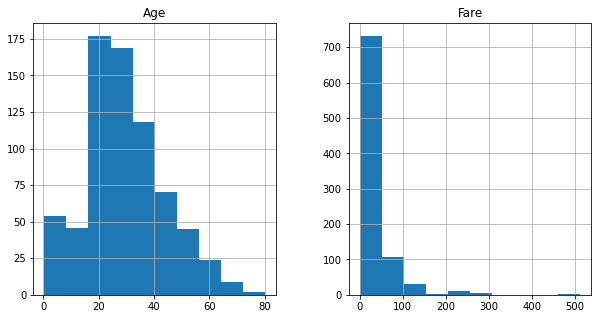

In [20]:
#Check skewness of numerical data
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(10,5))
plt.show()

In [21]:
#Age is right skewed,so median can be used for filling
for Age in ['Age']:
    data[Age]=data[Age].fillna(data[Age].median())
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [28]:
# Mode used for filling cabin and embarked columns
#data.fillna(data['Cabin'].mode()[0], inplace=True)
#data.fillna(data['Embarked'].mode()[0], inplace=True)
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode().loc(0))
print("Cabin: \n", data['Cabin'])
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode().loc(0))
print("Embarked: \n", data['Embarked'])

Cabin: 
 0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object
Embarked: 
 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object


In [48]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

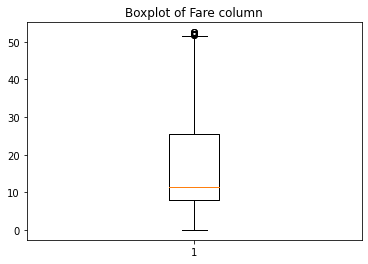

In [53]:
# 5. Check and handle outliers in at least 3 columns in the dataset

# Outliers in Fare column
plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare column')
plt.show()

In [50]:
Q1= np.percentile(data['Fare'],25)
Q3= np.percentile(data['Fare'],75)
IQR=Q3-Q1
low_lmt = Q1-1.5*IQR
up_lmt = Q3+1.5*IQR
outlier=[]
for i in data['Fare']:
    if((i<low_lmt) or (i>up_lmt)):
        outlier.append(i)
print("First Quartile :", Q1)
print("Third Quartile :", Q3)
print("IQR :", IQR)
print("Lower limit :",low_lmt)
print("Upper limit :",up_lmt)
print("\n Outlier is :", outlier)

First Quartile : 7.8958
Third Quartile : 25.840625
IQR : 17.944824999999998
Lower limit : -19.021437499999998
Upper limit : 52.7578625

 Outlier is : [53.1, 53.1, 53.1, 53.1, 53.1]


In [51]:
#locating outlier position
out1=data['Fare']>up_lmt
i=data.loc[out1].index
print(i)

Int64Index([3, 137, 724, 748, 809], dtype='int64')


In [52]:
data.drop(i,inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Text(0.5, 1.0, 'Boxplot of Age Column')

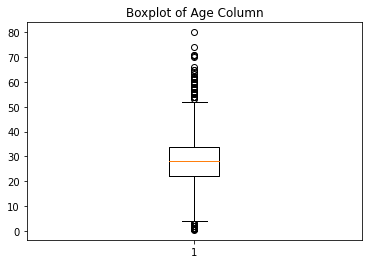

In [55]:
# Outliers in Age column
plt.boxplot(data['Age'])
plt.title('Boxplot of Age Column')

In [56]:
Q1= np.percentile(data['Age'],25)
Q3= np.percentile(data['Age'],75)
IQR=Q3-Q1
low_lmt = Q1-1.5*IQR
up_lmt = Q3+1.5*IQR
outlier=[]
for i in data['Fare']:
    if((i<low_lmt) or (i>up_lmt)):
        outlier.append(i)
print("First Quartile :", Q1)
print("Third Quartile :", Q3)
print("IQR :", IQR)
print("Lower limit :",low_lmt)
print("Upper limit :",up_lmt)
print("\n Outlier is :", outlier)

First Quartile : 22.0
Third Quartile : 34.0
IQR : 12.0
Lower limit : 4.0
Upper limit : 52.0

 Outlier is : [0.0, 52.5542, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 52.5542, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 52.5542]


In [58]:
#locating outlier position
out2=(data['Age']>up_lmt) | (data['Age']<low_lmt)
i2=data.loc[out2].index
print(i2)

Int64Index([  6,   7,  11,  15,  16,  33,  43,  78,  94,  96, 116, 119, 152,
            164, 170, 172, 174, 183, 193, 205, 232, 249, 252, 261, 280, 317,
            326, 340, 348, 374, 381, 386, 407, 456, 467, 469, 479, 483, 487,
            492, 493, 530, 545, 555, 570, 571, 582, 625, 626, 630, 642, 644,
            647, 672, 684, 694, 755, 772, 774, 788, 803, 824, 827, 831, 851],
           dtype='int64')


In [59]:
data.drop(i2,inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Text(0.5, 1.0, 'Boxplot of P Class column')

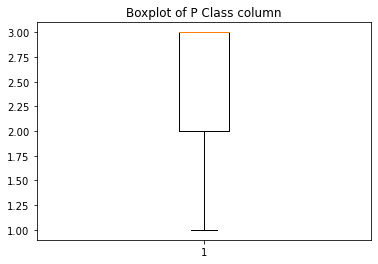

In [62]:
#Outliers in P class column

plt.boxplot(data['Pclass'])
plt.title('Boxplot of P Class column')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  680 non-null    int64  
 1   Survived     680 non-null    int64  
 2   Pclass       680 non-null    int64  
 3   Name         680 non-null    object 
 4   Sex          680 non-null    object 
 5   Age          680 non-null    float64
 6   SibSp        680 non-null    int64  
 7   Parch        680 non-null    int64  
 8   Ticket       680 non-null    object 
 9   Fare         680 non-null    float64
 10  Cabin        680 non-null    object 
 11  Embarked     680 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 69.1+ KB


In [64]:
# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)
Scale=data['Survived']
Scale.describe()

count    680.000000
mean       0.314706
std        0.464740
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [73]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler()
Scale=np.array(Scale).reshape(-1,1)
Scale=minmax.fit_transform(Scale)
Scale=pd.DataFrame(Scale)
print(Scale)

       0
0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
..   ...
675  0.0
676  1.0
677  0.0
678  1.0
679  0.0

[680 rows x 1 columns]


In [74]:
Scale.describe()

,0
count,680.000000
mean,0.314706
std,0.464740
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000
